# Importing Libraries and Reading the Dataset

In [5]:
!pip install langdetect

In [1]:
!unzip Dataset.zip -d Dataset

Archive:  Dataset.zip
  inflating: Dataset/Dataset/0000028b5cc154f68b8a269f6578f21e31f62977.json  
  inflating: Dataset/Dataset/0000b6da665726420ab8ac9246d526f2f44d5943.json  
  inflating: Dataset/Dataset/0000b93c66f991236db92dc16fa6db119b27ca12.json  
  inflating: Dataset/Dataset/0000fcce604204b1b9d876dc073eb529eb5ce305.json  
  inflating: Dataset/Dataset/000122a9a774ec76fa35ec0c0f6734e7e8d0c541.json  
  inflating: Dataset/Dataset/00013062c83cef3b89e6c5363ea4398571000905.json  
  inflating: Dataset/Dataset/00013694fb8095bb818b64346f791a5419d97c88.json  
  inflating: Dataset/Dataset/0001418189999fea7f7cbe3e82703d71c85a6fe5.json  
  inflating: Dataset/Dataset/000159d40045de3f55c9ddd5d99d760d679d4910.json  
  inflating: Dataset/Dataset/00016663c74157a66b4d509d5c4edffd5391bbe0.json  
  inflating: Dataset/Dataset/0001731462dcd83c5c547774a37071e5cbf981a2.json  
  inflating: Dataset/Dataset/0001bbba65c675eb2c0b1ecea737ac065d7124e1.json  
  inflating: Dataset/Dataset/000209cd97f65eb8cf1b2ac1d

In [6]:
import os
import json
import pandas as pd
from langdetect import detect

In [7]:
path_folder = "/content/Dataset/Dataset"
pdf_json_files = os.listdir(path_folder)
pdf_json_files = [file for file in pdf_json_files if file.endswith(".json")]
num_files_to_extract =400
pdf_json_files = pdf_json_files[:num_files_to_extract]
print(len(pdf_json_files))
for file in pdf_json_files:
    print(file)

400
002091b79f8825bdf0815e201d2f2f56dd7f58d2.json
0011ffcbe188b284002e2763c547fe09f7f5cdae.json
0011ddfef82542d0e5dfa0cc22e08795f99c67a4.json
00e1cc3e2f12ed081c1e84d05060dd8523215901.json
00eb89750edf9efc814125b7a9d8d859c0737160.json
0010f32ac43ca5864983343672936b536431ae90.json
000e5f36122f81fec6a4bd034330bc0935e413a8.json
00d88f4a37b5d775b299e41b622594055cbdd57a.json
00dc9435e19f3c8bb02d896af6aa51ab904b46c1.json
00e4866f1cb333ee22705855790e7304698b6b4c.json
0032c74f2141cbe3622d8f54de2de0c33df87089.json
001e82388db4d68a8dc7545cbaee5ca00ced0412.json
0001418189999fea7f7cbe3e82703d71c85a6fe5.json
0023b8f2635eaf30aa9ddbacba8242b473650809.json
00240d1460e7ffa6df0bfa645d4ae39b657559ce.json
00f1828848202b86149750d0f4cd02d60bcfce91.json
00de40db0c80064b049e3b90d4a6710bb2dfcbc8.json
001916486b2012ccc611fe18d4763f9e81517cbb.json
000b88a3a342f55aab834668b790458e1d4bab43.json
00326efcca0852dc6e39dc6b7786267e1bc4f194.json
00219e7e7403fdbf6eb21858105f5fd36fe2ffed.json
00db257dd89064431bbc10767cdccf

# Extracting the useful Information from the dataset

In [8]:
extracted_data = []

for file in pdf_json_files:
    file_path = os.path.join(path_folder, file)
    body_text=''
    with open(file_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)
        paper_id = data["paper_id"]
        title = data["metadata"]["title"] if len(data["metadata"]["title"]) > 0 else "Document Has No Title"
        for i in range(0,len(data["body_text"])):
            body_text+=data["body_text"][i]["text"] if len(data["body_text"]) > 0 else ""
            body_text+=''
        extracted_info = {
            "paper_id": paper_id,
            "title": title,
            "body_text": body_text
        }
        extracted_data.append(extracted_info)



print("Paper ID:", extracted_data[10]["paper_id"])
print("Title:", extracted_data[10]["title"])
print("Body Text :", extracted_data[10]["body_text"])


Paper ID: 0032c74f2141cbe3622d8f54de2de0c33df87089
Title: Analysis of 329,942 SARS-CoV-2 records retrieved from GISAID database
Body Text : A virus that appeared in Wuhan in December 2019 was not initially expected to cause a worldwide crisis and a deadly pandemic. It was soon recognized as a coronavirus, a single-stranded positivesense RNA virus belonging to a Coronaviridae family, whose members have already frightened humankind before. First discovered in the 1960s, two Coronaviridae family members (CoV-229E and CoVOC43) did not present a global threat (Qi et Walls et al., 2020) . The worst outcomes of the COVID-19, the disease caused by SARS-CoV-2, are currently associated with old age (65 and older), male gender, smoking, and comorbidities such as diabetes, cardiovascular disorders, and hypertension (de Sousa et al., 2020) . At present, over a year and a half later, the reasons for SARS-CoV-2 high transmissibility are still elusive. Most researchers focus on the viral genome, its e

# Coverting the data into a dataframe

In [9]:
df = pd.DataFrame(extracted_data)
df.head(10)

,paper_id,title,body_text
0,002091b79f8825bdf0815e201d2f2f56dd7f58d2,THE IMPACT OF THE COVID-19 EPIDEMIC ON OLDER A...,The first confirmed case of coronavirus 2019 i...
1,0011ffcbe188b284002e2763c547fe09f7f5cdae,Who Can I Trust in a Scary World? An Examinati...,While numerous studies have investigated trust...
2,0011ddfef82542d0e5dfa0cc22e08795f99c67a4,Document Has No Title,The severe acute respiratory syndrome coronavi...
3,00e1cc3e2f12ed081c1e84d05060dd8523215901,"Rapid, Affordable and Scalable SARS-CoV-2 Dete...",Since early 2020 the world has been overtaken ...
4,00eb89750edf9efc814125b7a9d8d859c0737160,Document Has No Title,It is known that some COVID-19 patients have p...
5,0010f32ac43ca5864983343672936b536431ae90,RESPIRATORY DISTRESS DETECTION FROM TELEPHONE ...,"Respiratory diseases, including asthma, chroni..."
6,000e5f36122f81fec6a4bd034330bc0935e413a8,Robots do not judge: service robots can allevi...,That robots will be increasingly employed in f...
7,00d88f4a37b5d775b299e41b622594055cbdd57a,Document Has No Title,different parts of a solid sample 5 . The auth...
8,00dc9435e19f3c8bb02d896af6aa51ab904b46c1,Corticosteroid Pulses for Hospitalized Patient...,"In December 2019, a new betacoronavirus called..."
9,00e4866f1cb333ee22705855790e7304698b6b4c,Document Has No Title,"In the last 18 years, there have been three co..."


# Data Pre processing and visualization

In [10]:
english_rows = []

for index, row in df.iterrows():
    text = row['body_text']
    try:
        lang = detect(text)
        if lang == 'en':
            english_rows.append(index)
    except:
        pass
df= df.loc[english_rows]

In [11]:
df

,paper_id,title,body_text
0,002091b79f8825bdf0815e201d2f2f56dd7f58d2,THE IMPACT OF THE COVID-19 EPIDEMIC ON OLDER A...,The first confirmed case of coronavirus 2019 i...
1,0011ffcbe188b284002e2763c547fe09f7f5cdae,Who Can I Trust in a Scary World? An Examinati...,While numerous studies have investigated trust...
2,0011ddfef82542d0e5dfa0cc22e08795f99c67a4,Document Has No Title,The severe acute respiratory syndrome coronavi...
3,00e1cc3e2f12ed081c1e84d05060dd8523215901,"Rapid, Affordable and Scalable SARS-CoV-2 Dete...",Since early 2020 the world has been overtaken ...
4,00eb89750edf9efc814125b7a9d8d859c0737160,Document Has No Title,It is known that some COVID-19 patients have p...
...,...,...,...
395,0a0befc62d8c3da285acc99c45f614dbdccaad10,Antibody escape and global spread of SARS-CoV-...,"T he continuing pandemic spread of SARS-CoV-2,..."
396,002e47e3d05b7bb891b9027b335de165d59d1b8b,TR-PIV measurement of exhaled flow using a bre...,Coughing and sneezing are considered to be hig...
397,002aaf9cf7c4d1c8825fc2088050ff12a3a36a74,External validation of 4C ISARIC mortality sco...,develop and validate such a tool (ISARIC 4C Mo...
398,000bc3d4637530496ac4cb798e10d95709eff92d,FDA Perspectives on Diagnostic Device Clinical...,Two pathways are described for submission to F...


In [12]:
df.reset_index(inplace=True,drop=True)

In [13]:
len(df)

392

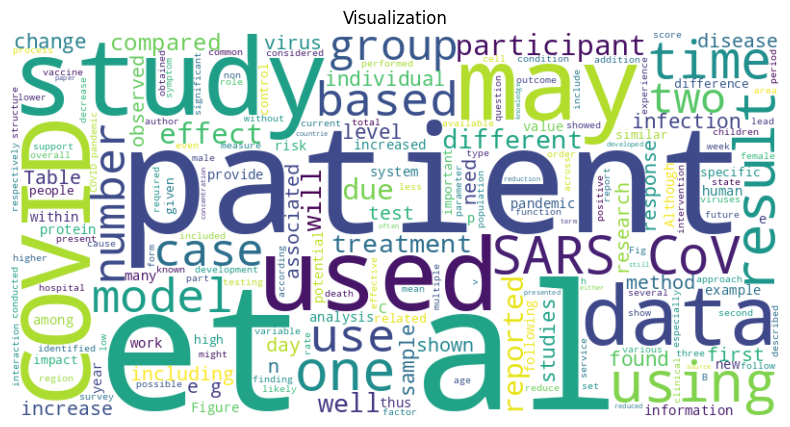

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df['body_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Visualization')
plt.show()


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [17]:
df['preprocessed_body_text'] = df['body_text'].apply(preprocess_text)

In [18]:
df.head(10)

,paper_id,title,body_text,preprocessed_body_text
0,002091b79f8825bdf0815e201d2f2f56dd7f58d2,THE IMPACT OF THE COVID-19 EPIDEMIC ON OLDER A...,The first confirmed case of coronavirus 2019 i...,first confirmed case coronavirus 2019 mexico c...
1,0011ffcbe188b284002e2763c547fe09f7f5cdae,Who Can I Trust in a Scary World? An Examinati...,While numerous studies have investigated trust...,numerous study investigated trust-a key constr...
2,0011ddfef82542d0e5dfa0cc22e08795f99c67a4,Document Has No Title,The severe acute respiratory syndrome coronavi...,severe acute respiratory syndrome coronavirus-...
3,00e1cc3e2f12ed081c1e84d05060dd8523215901,"Rapid, Affordable and Scalable SARS-CoV-2 Dete...",Since early 2020 the world has been overtaken ...,since early 2020 world overtaken covid-19 pand...
4,00eb89750edf9efc814125b7a9d8d859c0737160,Document Has No Title,It is known that some COVID-19 patients have p...,known covid-19 patient poor outcome factor res...
5,0010f32ac43ca5864983343672936b536431ae90,RESPIRATORY DISTRESS DETECTION FROM TELEPHONE ...,"Respiratory diseases, including asthma, chroni...",respiratory disease including asthma chronic o...
6,000e5f36122f81fec6a4bd034330bc0935e413a8,Robots do not judge: service robots can allevi...,That robots will be increasingly employed in f...,robot increasingly employed frontline service ...
7,00d88f4a37b5d775b299e41b622594055cbdd57a,Document Has No Title,different parts of a solid sample 5 . The auth...,different part solid sample 5 author turned na...
8,00dc9435e19f3c8bb02d896af6aa51ab904b46c1,Corticosteroid Pulses for Hospitalized Patient...,"In December 2019, a new betacoronavirus called...",december 2019 new betacoronavirus called sars-...
9,00e4866f1cb333ee22705855790e7304698b6b4c,Document Has No Title,"In the last 18 years, there have been three co...",last 18 year three coronavirus outbreak severe...


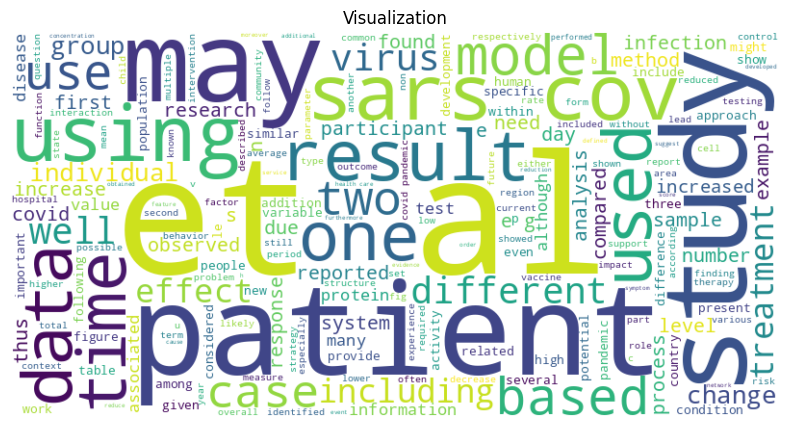

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df['preprocessed_body_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Visualization')
plt.show()


In [20]:
from tqdm import tqdm
import pandas as pd

In [21]:
df.to_csv('cleaned_data.csv', index=False)

In [22]:
!pip -q install transformers

# Generating Embeddings from text

In [23]:
import torch
from keras.utils import pad_sequences
from transformers import BertTokenizer,  AutoModelForSequenceClassification
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from transformers import BertTokenizer, AutoModel

In [24]:
model_path = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_path, do_lower_case=True)
model = AutoModel.from_pretrained(model_path, output_hidden_states=True)

def create_vector_from_text(tokenizer, model, text, max_len=512):
    input_ids = tokenizer.encode(
        text,
        add_special_tokens=True,
        max_length=max_len,
        truncation=True
    )
    input_ids = torch.tensor(input_ids).unsqueeze(0)

    with torch.no_grad():
        outputs = model(input_ids)
        encoded_layers = outputs.hidden_states
        layer_i = 12
        token_i = 0
        vector = encoded_layers[layer_i][0][token_i].detach().cpu().numpy()

    return vector

def create_vector_database(data):
    vectors = []

    for text in tqdm(data['preprocessed_body_text']):
        vector = create_vector_from_text(tokenizer, model, text)
        vectors.append(vector)

    data['vectors'] = vectors
    data['vectors_2d'] = data['vectors'].apply(lambda emb: emb.reshape(1, -1))  # Reshape vectors to 2D arrays
    data.drop('vectors',axis=1,inplace=True)
    return data
def preprocess_query(query_text):
    query_vector = create_vector_from_text(tokenizer,model,query_text)
    return query_vector

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [25]:
vector_database = create_vector_database(df)
vector_database.to_csv("text_with_vectors.csv",index=False)
vector_database


100%|██████████| 392/392 [01:47<00:00,  3.65it/s]


,paper_id,title,body_text,preprocessed_body_text,vectors_2d
0,002091b79f8825bdf0815e201d2f2f56dd7f58d2,THE IMPACT OF THE COVID-19 EPIDEMIC ON OLDER A...,The first confirmed case of coronavirus 2019 i...,first confirmed case coronavirus 2019 mexico c...,"[[-0.32290804, 0.12500343, 0.71515477, 0.54749..."
1,0011ffcbe188b284002e2763c547fe09f7f5cdae,Who Can I Trust in a Scary World? An Examinati...,While numerous studies have investigated trust...,numerous study investigated trust-a key constr...,"[[-0.12479933, 0.24851178, 0.16045055, -0.0969..."
2,0011ddfef82542d0e5dfa0cc22e08795f99c67a4,Document Has No Title,The severe acute respiratory syndrome coronavi...,severe acute respiratory syndrome coronavirus-...,"[[-0.41907996, 0.16937247, 0.37066993, -0.2081..."
3,00e1cc3e2f12ed081c1e84d05060dd8523215901,"Rapid, Affordable and Scalable SARS-CoV-2 Dete...",Since early 2020 the world has been overtaken ...,since early 2020 world overtaken covid-19 pand...,"[[-0.8443108, 0.1932013, 0.23261982, -0.174600..."
4,00eb89750edf9efc814125b7a9d8d859c0737160,Document Has No Title,It is known that some COVID-19 patients have p...,known covid-19 patient poor outcome factor res...,"[[-0.5726577, 0.21494891, 0.21107534, -0.00161..."
...,...,...,...,...,...
387,0a0befc62d8c3da285acc99c45f614dbdccaad10,Antibody escape and global spread of SARS-CoV-...,"T he continuing pandemic spread of SARS-CoV-2,...",continuing pandemic spread sars-cov-2 causativ...,"[[-0.59997463, 0.058336385, 0.11627307, -0.135..."
388,002e47e3d05b7bb891b9027b335de165d59d1b8b,TR-PIV measurement of exhaled flow using a bre...,Coughing and sneezing are considered to be hig...,coughing sneezing considered high-risk behavio...,"[[-0.6851208, 0.1611913, 0.51739097, -0.051441..."
389,002aaf9cf7c4d1c8825fc2088050ff12a3a36a74,External validation of 4C ISARIC mortality sco...,develop and validate such a tool (ISARIC 4C Mo...,develop validate tool isaric 4c mortality scor...,"[[-0.49521053, -0.112851255, 0.20013699, 0.156..."
390,000bc3d4637530496ac4cb798e10d95709eff92d,FDA Perspectives on Diagnostic Device Clinical...,Two pathways are described for submission to F...,two pathway described submission fda clearance...,"[[-0.5853143, 0.45694065, 0.07296599, 0.105947..."


In [52]:

index_to_drop = vector_database[vector_database['body_text'] == '.Ibrutinib Cytokines cytotoxic T-lymphocyte-associated protein 4'].index
print(index_to_drop)
vector_database.drop(index=index_to_drop, inplace=True)
vector_database.reset_index(drop=True,inplace=True)
vector_database

Index([273], dtype='int64')


,paper_id,title,body_text,preprocessed_body_text,vectors_2d,similarity
0,00e1cc3e2f12ed081c1e84d05060dd8523215901,"Rapid, Affordable and Scalable SARS-CoV-2 Dete...",Since early 2020 the world has been overtaken ...,since early 2020 world overtaken covid-19 pand...,"[[-0.8443108, 0.1932013, 0.23261982, -0.174600...",0.643123
1,00eb89750edf9efc814125b7a9d8d859c0737160,Document Has No Title,It is known that some COVID-19 patients have p...,known covid-19 patient poor outcome factor res...,"[[-0.5726577, 0.21494891, 0.21107534, -0.00161...",0.562062
2,0010f32ac43ca5864983343672936b536431ae90,RESPIRATORY DISTRESS DETECTION FROM TELEPHONE ...,"Respiratory diseases, including asthma, chroni...",respiratory disease including asthma chronic o...,"[[-0.32947558, 0.44808176, 0.14062557, 0.02157...",0.533868
3,000e5f36122f81fec6a4bd034330bc0935e413a8,Robots do not judge: service robots can allevi...,That robots will be increasingly employed in f...,robot increasingly employed frontline service ...,"[[-0.4594516, 0.23210731, 0.47777793, -0.28432...",0.448622
4,00d88f4a37b5d775b299e41b622594055cbdd57a,Document Has No Title,different parts of a solid sample 5 . The auth...,different part solid sample 5 author turned na...,"[[-0.5957243, 0.2702794, 0.13624705, -0.081950...",0.525842
...,...,...,...,...,...,...
383,0a0befc62d8c3da285acc99c45f614dbdccaad10,Antibody escape and global spread of SARS-CoV-...,"T he continuing pandemic spread of SARS-CoV-2,...",continuing pandemic spread sars-cov-2 causativ...,"[[-0.59997463, 0.058336385, 0.11627307, -0.135...",0.522147
384,002e47e3d05b7bb891b9027b335de165d59d1b8b,TR-PIV measurement of exhaled flow using a bre...,Coughing and sneezing are considered to be hig...,coughing sneezing considered high-risk behavio...,"[[-0.6851208, 0.1611913, 0.51739097, -0.051441...",0.386520
385,002aaf9cf7c4d1c8825fc2088050ff12a3a36a74,External validation of 4C ISARIC mortality sco...,develop and validate such a tool (ISARIC 4C Mo...,develop validate tool isaric 4c mortality scor...,"[[-0.49521053, -0.112851255, 0.20013699, 0.156...",0.555874
386,000bc3d4637530496ac4cb798e10d95709eff92d,FDA Perspectives on Diagnostic Device Clinical...,Two pathways are described for submission to F...,two pathway described submission fda clearance...,"[[-0.5853143, 0.45694065, 0.07296599, 0.105947...",0.562209


# Computing the similarity score between query and vector databse to retrieve top n relevant docs.

In [53]:
def is_similar(similarity_score, similarity_threshold):
    return similarity_score >= similarity_threshold

def run_similarity_analysis(query_vect, data, similarity_threshold=0.0):
    top_N = 10
    query_vect_2d = query_vect.reshape(1, -1)
    data["similarity"] = data["vectors_2d"].apply(lambda x: cosine_similarity(query_vect_2d, x))
    data["similarity"] = data["similarity"].apply(lambda x: x[0][0])  # Extract the similarity score
    similar_articles = data[data["similarity"] >= similarity_threshold].sort_values(by='similarity', ascending=False).reset_index(drop=True).head(top_N)

    return similar_articles

In [60]:
query_text =  """All Malagasy bat paramyxoviruses sequences obtained within this study fell within group of Unclassified Morbillivirus-Related viruses"""
query_text=preprocess_text(query_text)
query_text

'malagasy bat paramyxovirus sequence obtained within study fell within group unclassified morbillivirus-related virus'

In [61]:
query_vector = preprocess_query(query_text)
similarity_threshold = 0.5
similar_articles = run_similarity_analysis(query_vector, vector_database, similarity_threshold)
similar_articles.reset_index(inplace=True)
similar_articles.drop('index',axis=1,inplace=True)

# Retrieved docx based on query

In [62]:
similar_articles

,paper_id,title,body_text,preprocessed_body_text,vectors_2d,similarity
0,000b7d1517ceebb34e1e3e817695b6de03e2fa78,Supplementary Information An eco-epidemiologic...,- Figure S1 : Phylogeny of all sequences belon...,figure s1 phylogeny sequence belonging umrv ph...,"[[-0.70169485, -0.06834543, -0.34131783, -0.17...",0.868507
1,0016b42bcac1d327bd32513990c2e654ba2933fd,Update on the COVID-19-associated inflammatory...,Paediatricians and many families are aware of ...,paediatrician many family aware recent report ...,"[[-0.37065023, 0.1901491, 0.24735904, -0.27882...",0.792545
2,0012a43f0802101e49ddbbbd115aac4f48044746,Vaccination and multiple sclerosis in the era ...,Vaccination and multiple sclerosis in the era ...,vaccination multiple sclerosis era covid-19 pa...,"[[-0.666895, 0.33013213, 0.12034437, -0.173690...",0.777899
3,00f55cc335e36a5384f8b59600eea6ced34af789,Journal Pre-proof Effects of simeprevir on the...,COVID-19 (coronavirus disease 2019) is a highl...,covid-19 coronavirus disease 2019 highly infec...,"[[-0.69613403, 0.07687217, 0.16713227, -0.3306...",0.775374
4,00f72ff0dc58a60ef31950d0f28c33dfaf1bf2eb,Nosocomial outbreak of COVID-19 pneumonia in W...,17 years after the 2003 epidemic of severe acu...,17 year 2003 epidemic severe acute respiratory...,"[[-0.6404649, 0.0036227228, -0.12324885, -0.03...",0.775047
5,0022990153a2534acfb512416f989099c50c81fd,Document Has No Title,"Supplementary Figure 1 . A, B) Two MAbs or Nan...",supplementary figure 1 b two mabs nanobody-fc ...,"[[-0.6082306, -0.14158939, 0.32275173, -0.2580...",0.772637
6,0026f595cf76ad787495ee4a7bcee41c4156fc02,Document Has No Title,Polysplenia syndrome represents a type of left...,polysplenia syndrome represents type left atri...,"[[-0.2899219, 0.25902024, -0.08212772, -0.0529...",0.770839
7,00e7af2188897d57226ae59ebf7874882ff928a3,Cephalotaxine inhibits Zika infection by imped...,"The Zika virus (ZIKV) is a mosquito-borne, env...",zika virus zikv mosquito-borne enveloped rna v...,"[[-0.3993704, 0.21521406, 0.24182309, -0.32975...",0.768966
8,00f141e5595332765d5c1c1d2656adeb3c4128e8,Vitamin C and corticosteroids in viral pneumon...,| pISSN 2586-6052 | eISSN Acute and Critical C...,pissn 2586-6052 eissn acute critical caredear ...,"[[-0.39197683, 0.10245152, 0.19972773, -0.3103...",0.768200
9,00273115e577e3875f4e69e6b58ac2614ef0ad4c,Age cohorts stratified according to age-distri...,The ongoing coronavirus disease 2019 (COVID- 1...,ongoing coronavirus disease 2019 covid- 19 pan...,"[[-0.5922072, 0.30537328, 0.032833274, -0.0729...",0.767730


In [63]:
similar_articles['body_text'][0]
#radical cure therapy for vivax malaria in Myanmar

'- Figure S1 : Phylogeny of all sequences belonging to the UMRV phylogroup. - Table S4 : Bats cytochrome b sequences data set. -Table S5 : Test of host-parasite co-evolution using global fit methods ParaFit. Figure S1 . Phylogeny of all sequences belonging to the UMRV phylogroup. A global phylogeny of 308 partial L-gene sequences calculated in 10,000,000 iterations in MrBayes with the GTR + G + I evolutionary model and a 10% burn-in rooted with an Aquaparamyxovirus sequence (GenBank number EF646380). All Malagasy bat paramyxoviruses sequences obtained within this study fell within group of Unclassified Morbillivirus-Related viruses. Genbank accession numbers used for each virus genera are indicated in Table S6 . '